<a href="https://colab.research.google.com/github/chaandini2001/intro-ml-course-winter2025/blob/main/Datathon_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Uploading Data:**
Data = Datathon1-Dataset2 - HAD7001.csv



In [2]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving Datathon1-Dataset2 - HAD7001.csv to Datathon1-Dataset2 - HAD7001.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Datathon1-Dataset2 - HAD7001.csv']))
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


#**Data Preparation**



##Data Cleaning


In [32]:
import numpy as np
import pandas as pd

# Filtering data to remove those with biologically impluasible BMI values (BMI<16 and BMI>58)
df_filter = df.loc[df['BMI'] >= 16].copy()
df_filter2 = df_filter.loc[df_filter['Height'] >= 1.3716].copy()
df_filter3 = df_filter2.loc[df_filter['Age'] <= 65].copy()

##Creating "BMI Category" variable
High BMI: BMI >= 25

Normal or Low BMI:  BMI <25

In [33]:
df_filter3['BMI_Category'] = np.where(df_filter3['BMI'] >=25, 'High', 'Normal/Low')
df_filter3

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,BMI_Category
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343,High
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417,High
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720,High
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685,High
5,25,Male,1939,23,71,4,11,1.692665,65.076352,22.713344,Normal/Low
...,...,...,...,...,...,...,...,...,...,...,...
23530,51,Female,2858,65,37,1,9,1.774514,56.917788,18.075460,Normal/Low
23531,20,Female,2573,27,27,1,1,1.677173,57.277270,20.362283,Normal/Low
23532,26,Female,2246,37,44,0,3,1.661042,80.314959,29.109537,High
23533,22,Male,1588,24,101,4,7,1.577156,43.365424,17.433880,Normal/Low


##Descriptive Statistics

In [34]:
print(df_filter3.describe())

               Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  17012.00000    17012.000000  17012.000000       17012.000000   
mean      41.46479     2493.322126     64.725488          89.484775   
std       13.77354      578.026539     31.992085          52.036862   
min       18.00000     1500.000000     10.000000           0.000000   
25%       30.00000     1986.750000     37.000000          45.000000   
50%       41.00000     2494.000000     65.000000          90.000000   
75%       53.00000     2991.000000     93.000000         135.000000   
max       65.00000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         17012.000000  17012.000000  17012.000000  17012.000000   
mean              2.026511      5.493475      1.647504     71.649128   
std               1.418552      3.449649      0.113514     13.653261   
min               0.000000      0.000000      1.371783     32.113592   


In [35]:
print(df_filter3.isna().sum())
#Results: No NA values

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
BMI_Category           0
dtype: int64


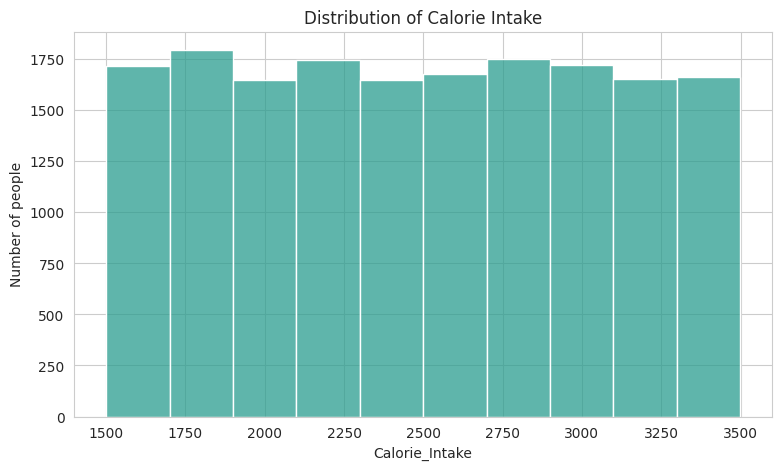

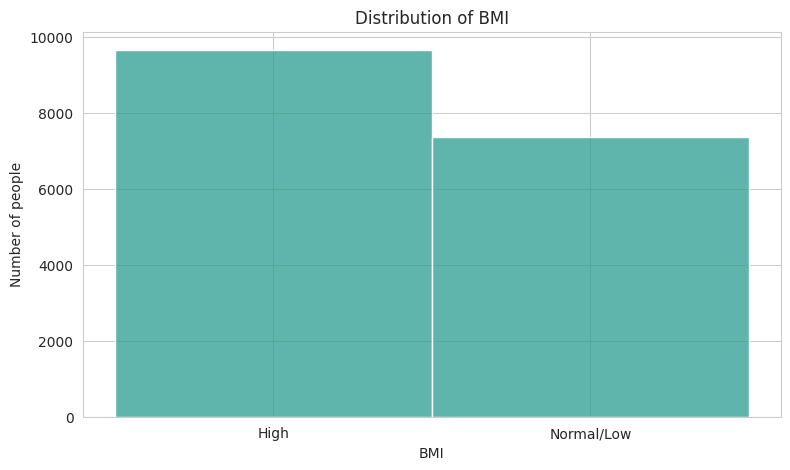

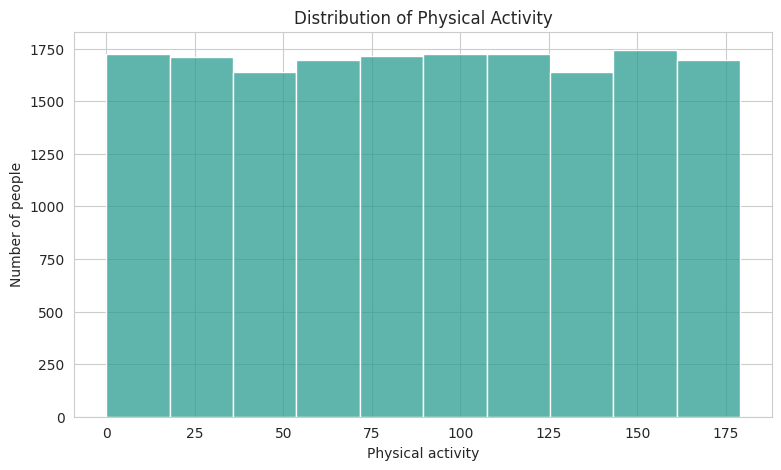

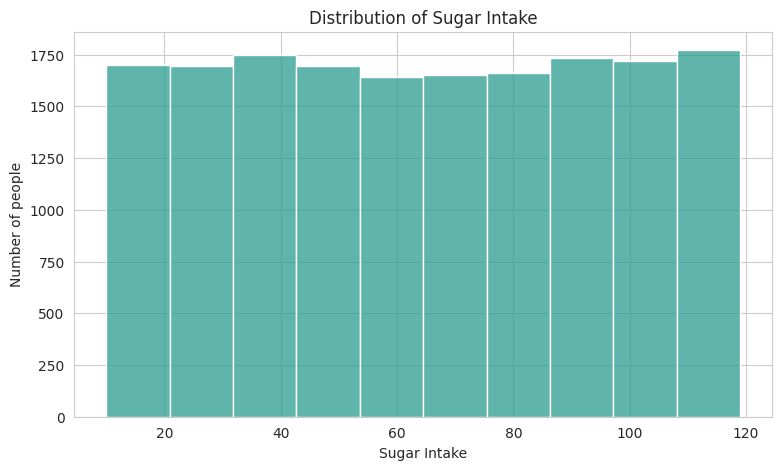

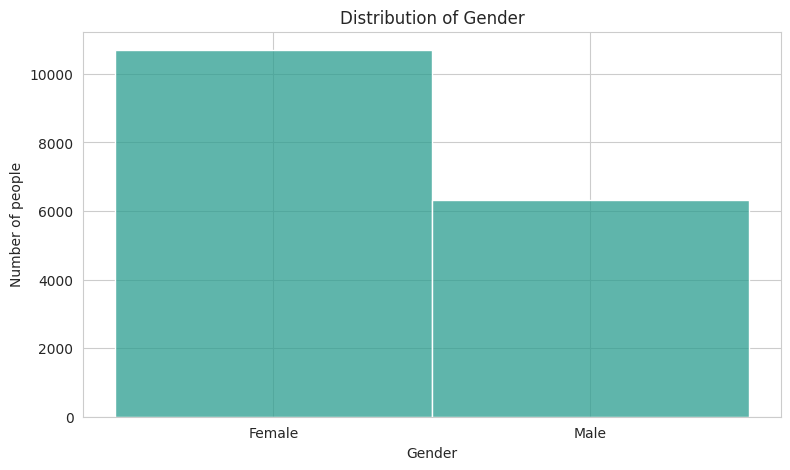

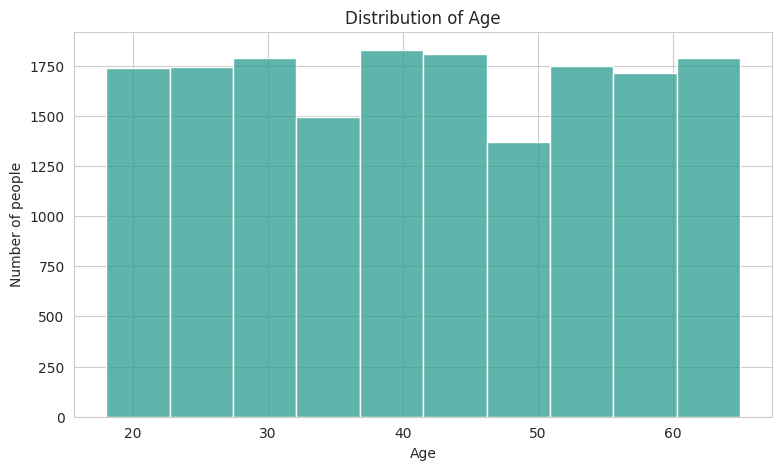

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Calorie Intake among Sample
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))
sns.histplot(df_filter3['Calorie_Intake'], bins=10, kde=False, color='#2a9d8f')
plt.title('Distribution of Calorie Intake')
plt.xlabel('Calorie_Intake')
plt.ylabel('Number of people')
plt.show()

# Distribution of BMI Category among Sample
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))
sns.histplot(df_filter3['BMI_Category'], bins=10, kde=False, color='#2a9d8f')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of people')
plt.show()

# Distribution of Physical Activity among Sample
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))
sns.histplot(df_filter3['Physical_Activity'], bins=10, kde=False, color='#2a9d8f')
plt.title('Distribution of Physical Activity')
plt.xlabel('Physical activity')
plt.ylabel('Number of people')
plt.show()

# Distribution of Sugar Intake among Sample
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))
sns.histplot(df_filter3['Sugar_Intake'], bins=10, kde=False, color='#2a9d8f')
plt.title('Distribution of Sugar Intake')
plt.xlabel('Sugar Intake')
plt.ylabel('Number of people')
plt.show()

# Distribution of Gender among Sample
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))
sns.histplot(df_filter3['Gender'], bins=10, kde=False, color='#2a9d8f')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

# Distribution of Age among Sample
sns.set_style('whitegrid')
plt.figure(figsize=(9, 5))
sns.histplot(df_filter3['Age'], bins=10, kde=False, color='#2a9d8f')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

##Correlation Matrix

In [37]:
le = LabelEncoder()
df_filter3['BMI_Category'] = le.fit_transform(df_filter3['BMI_Category'])
df_filter3['Gender'] = le.fit_transform(df_filter3['Gender'])
df_filter3

# BMI_Category (Label) Legend:
  # High = 0
  # Normal/Low = 1

# Gender Legend:
  # Female = 0
  # Male = 1

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,BMI_Category
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,0
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,0
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,0
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,0
5,25,1,1939,23,71,4,11,1.692665,65.076352,22.713344,1
...,...,...,...,...,...,...,...,...,...,...,...
23530,51,0,2858,65,37,1,9,1.774514,56.917788,18.075460,1
23531,20,0,2573,27,27,1,1,1.677173,57.277270,20.362283,1
23532,26,0,2246,37,44,0,3,1.661042,80.314959,29.109537,0
23533,22,1,1588,24,101,4,7,1.577156,43.365424,17.433880,1


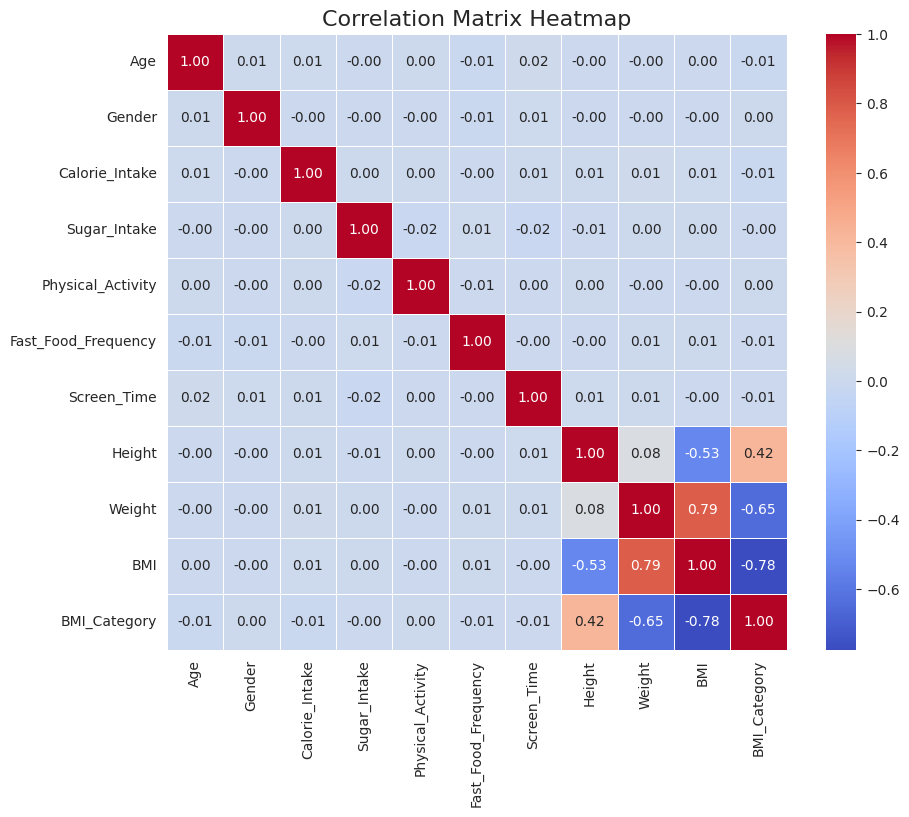

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_filter3.corr()
plt.figure(figsize=(10, 8))

# Heatmap of Correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

## Preparing data for K-NN Model

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
# Creating training and testing data for X and Y variables
X = df_filter3[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity']]
y = df_filter3['BMI_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the features to prevent scalling issues
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**K-Nearest Neighbour (K-NN) Analysis**

##Determining Best K (Hyperparameter Optimization)


Best k: 6 with mean accuracy: 0.5369


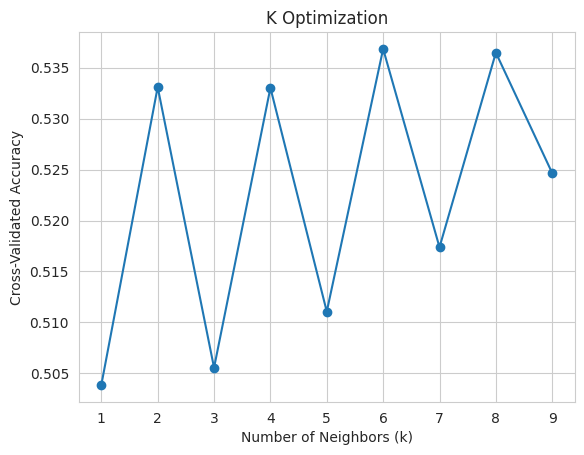

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Optimization
k_values = range(1, 10)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[np.argmax(mean_scores)]
print(f"Best k: {best_k} with mean accuracy: {max(mean_scores):.4f}")
# Results: K=6

# Plotting Results
import matplotlib.pyplot as plt
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Optimization')
plt.show()

##K-NN Model

In [30]:
# K-NN Model with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1203  729]
 [ 886  585]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1932
           1       0.45      0.40      0.42      1471

    accuracy                           0.53      3403
   macro avg       0.51      0.51      0.51      3403
weighted avg       0.52      0.53      0.52      3403



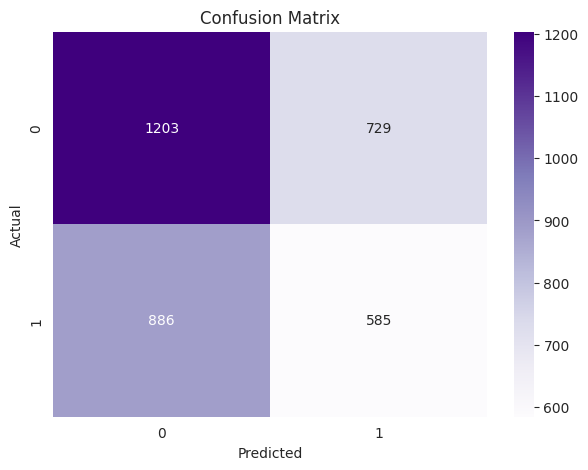

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

classes = df_filter3['BMI_Category'].unique()

# Confusion matrix of Model
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()